In [1]:
import numpy as np
import pandas as pd

In [2]:
car_df=pd.read_csv("Car_prices.csv")
car_df

Unnamed: 0     name  year  selling_price  km_driven    fuel seller_type  \
0              0   Maruti  2014         450000     145500  Diesel  Individual   
1              2  Hyundai  2010         225000     127000  Diesel  Individual   
2              4  Hyundai  2017         440000      45000  Petrol  Individual   
3              7   Toyota  2011         350000      90000  Diesel  Individual   
4              8     Ford  2013         200000     169000  Diesel  Individual   
...          ...      ...   ...            ...        ...     ...         ...   
2090        6245   Maruti  2017         425000      12000  Petrol  Individual   
2091        6246   Toyota  2014         425000      50000  Diesel  Individual   
2092        6249   Maruti  2011         200000      73000  Petrol  Individual   
2093        6253   Maruti  2017         360000      80000  Petrol  Individual   
2094        6256  Hyundai  2014         475000      80000  Diesel  Individual   

     transmission         owner  seats  max_power (in bph) Mileage Unit  \
0          Manual   First Owner      5               74.00         kmpl   
1          Manual   First Owner      5               90.00         kmpl   
2          Manual   First Owner      5               81.86         kmpl   
3          Manual   First Owner      5               67.10         kmpl   
4          Manual   First Owner      5               68.10         kmpl   
...           ...           ...    ...                 ...          ...   
2090       Manual   First Owner      5               67.04         kmpl   
2091       Manual   First Owner      5               67.06         kmpl   
2092       Manual   First Owner      5               46.30         kmpl   
2093       Manual   First Owner      5               67.04         kmpl   
2094       Manual  Second Owner      5               88.73         kmpl   

      Mileage  Engine (CC)  
0       23.40         1248  
1       23.00         1396  
2       20.14         1197  
3       23.59         1364  
4       20.00         1399  
...       ...          ...  
2090    23.10          998  
2091    23.59         1364  
2092    19.70          796  
2093    20.51          998  
2094    22.54         1396  

[2095 rows x 14 columns]

In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


In [4]:
car_df.describe()

Unnamed: 0         year  selling_price      km_driven        seats  \
count  2095.000000  2095.000000   2.095000e+03    2095.000000  2095.000000   
mean   3155.537947  2014.052506   4.272799e+05   67413.593795     5.096897   
std    1791.039215     3.273451   2.326698e+05   41580.846333     0.457000   
min       0.000000  2000.000000   4.595700e+04    1000.000000     4.000000   
25%    1589.500000  2012.000000   2.500000e+05   35000.000000     5.000000   
50%    3185.000000  2014.000000   3.900000e+05   60000.000000     5.000000   
75%    4709.500000  2017.000000   5.555000e+05   90000.000000     5.000000   
max    6256.000000  2020.000000   1.594000e+06  270000.000000     8.000000   

       max_power (in bph)      Mileage  Engine (CC)  
count         2095.000000  2095.000000  2095.000000  
mean            77.410427    21.397928  1205.078282  
std             19.884938     1.209234   245.058696  
min             35.000000    19.600000   624.000000  
25%             67.040000    20.360000   998.000000  
50%             74.000000    21.100000  1248.000000  
75%             88.730000    22.540000  1396.000000  
max            126.320000    23.590000  1598.000000

In [5]:
car_df['seats'].unique()

array([5, 7, 8, 4], dtype=int64)

In [6]:
car_df['seller_type'].unique()


array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [7]:
car_df['Mileage Unit'].unique()

array(['kmpl', 'km/kg'], dtype=object)

In [8]:
car_df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
# Check for columns with only one unique value
car_df.nunique()

Unnamed: 0            2095
name                    10
year                    20
selling_price          308
km_driven              372
fuel                     4
seller_type              3
transmission             2
owner                    5
seats                    4
max_power (in bph)      77
Mileage Unit             2
Mileage                 86
Engine (CC)             27
dtype: int64

In [10]:
car_df['Unnamed: 0'].head() 


0    0
1    2
2    4
3    7
4    8
Name: Unnamed: 0, dtype: int64

In [11]:
car_df = car_df.drop('Unnamed: 0', axis=1)

In [12]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
fig=px.histogram(car_df,
                 x='year',
                 nbins=38,
                 marginal='box',
                 title='YEARLY_SELLING')
fig.update_layout(bargap=0.05)
fig.show()

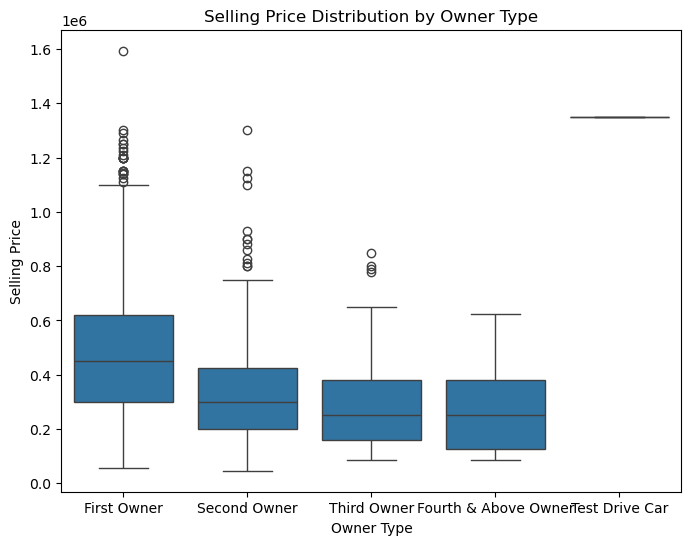

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x='owner', y='selling_price', data=car_df)
plt.title('Selling Price Distribution by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.show()

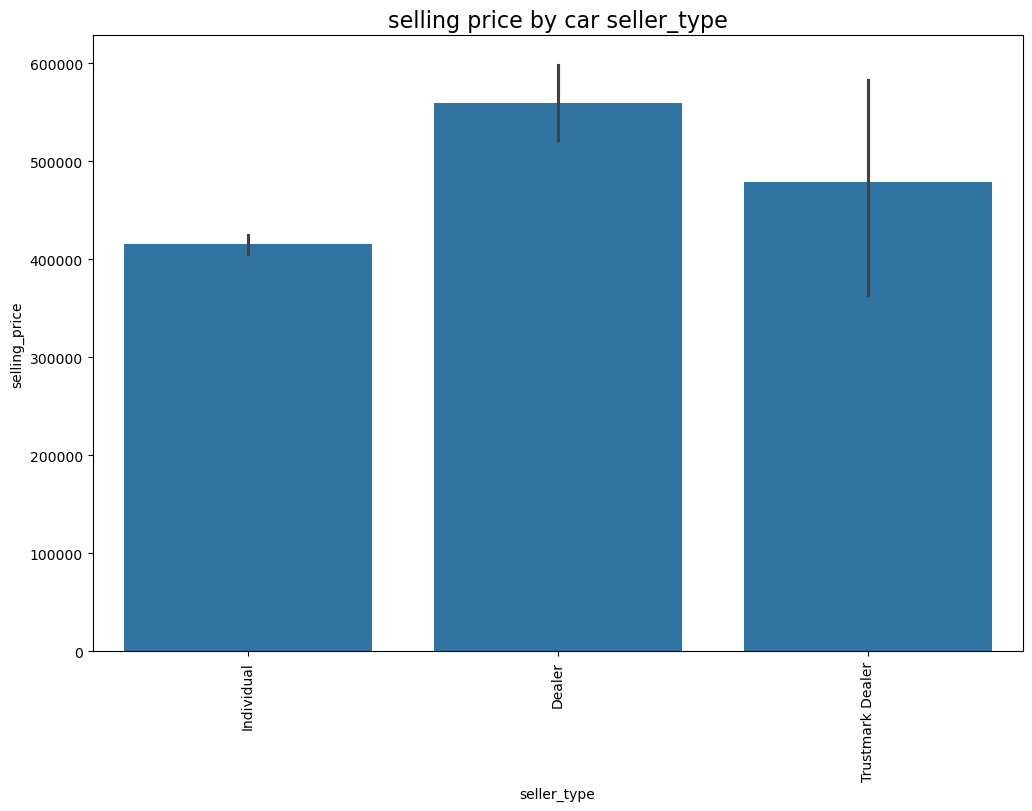

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x='seller_type', y='selling_price', data=car_df, estimator='mean')
plt.xticks(rotation=90)  # Rotate car names for better readability
plt.title('selling price by car seller_type', fontsize=16)

plt.show()

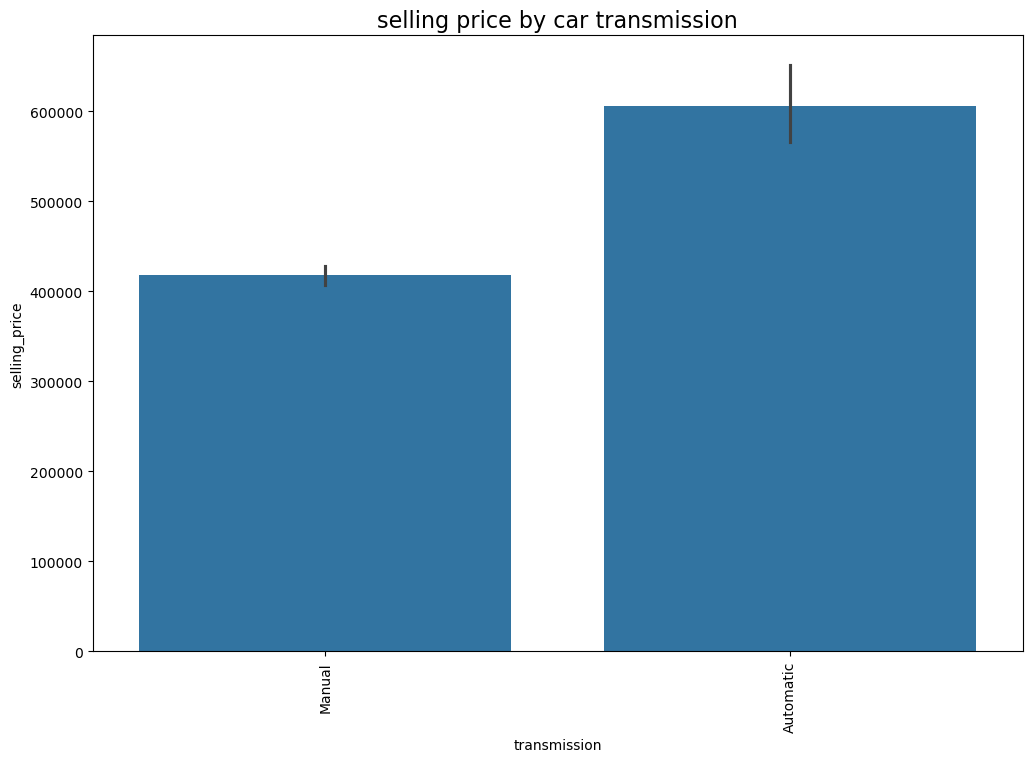

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x='transmission', y='selling_price', data=car_df, estimator='mean')
plt.xticks(rotation=90)  # Rotate car names for better readability
plt.title('selling price by car transmission', fontsize=16)

plt.show()

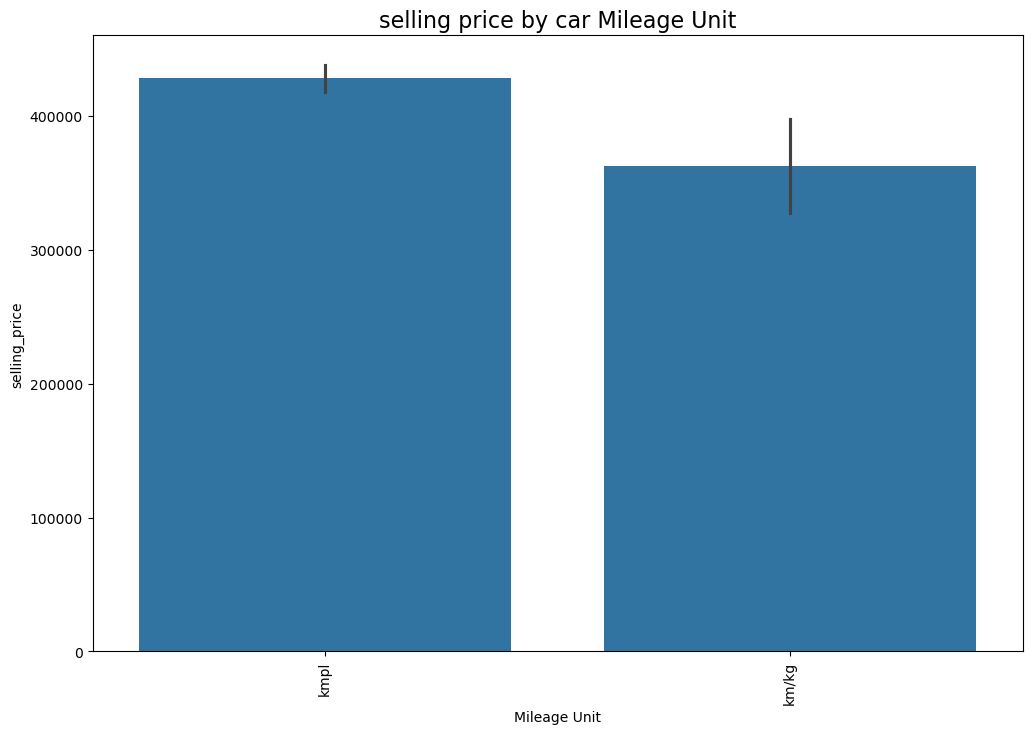

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x='Mileage Unit', y='selling_price', data=car_df, estimator='mean')
plt.xticks(rotation=90)  # Rotate car names for better readability
plt.title('selling price by car Mileage Unit', fontsize=16)

plt.show()

In [18]:
fig = px.histogram(car_df, x='selling_price', nbins=20, title='Distribution of Selling Prices')
fig.update_layout(bargap=0.05)
fig.show()

In [19]:

fig=px.histogram(car_df,
                 x='selling_price',
                 color='fuel',
                 title='Selling Price vs Fuel')
fig.update_layout(bargap=0.05)
fig.show()

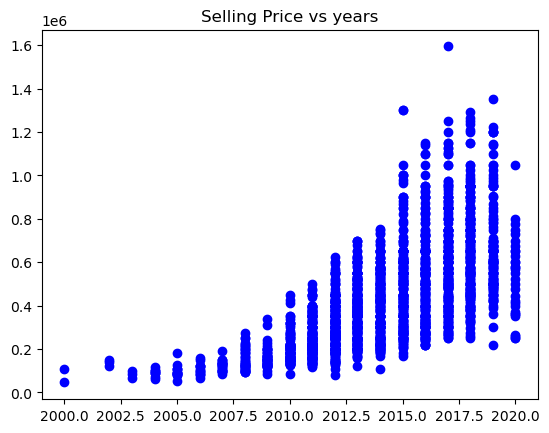

In [20]:
plt.scatter(car_df['year'], car_df['selling_price'], color='blue')
plt.title('Selling Price vs years')
plt.show()


In [21]:
fig = px.histogram(car_df, x='name', nbins=20, title='Distribution of names')
fig.update_layout(bargap=0.05)
fig.show()

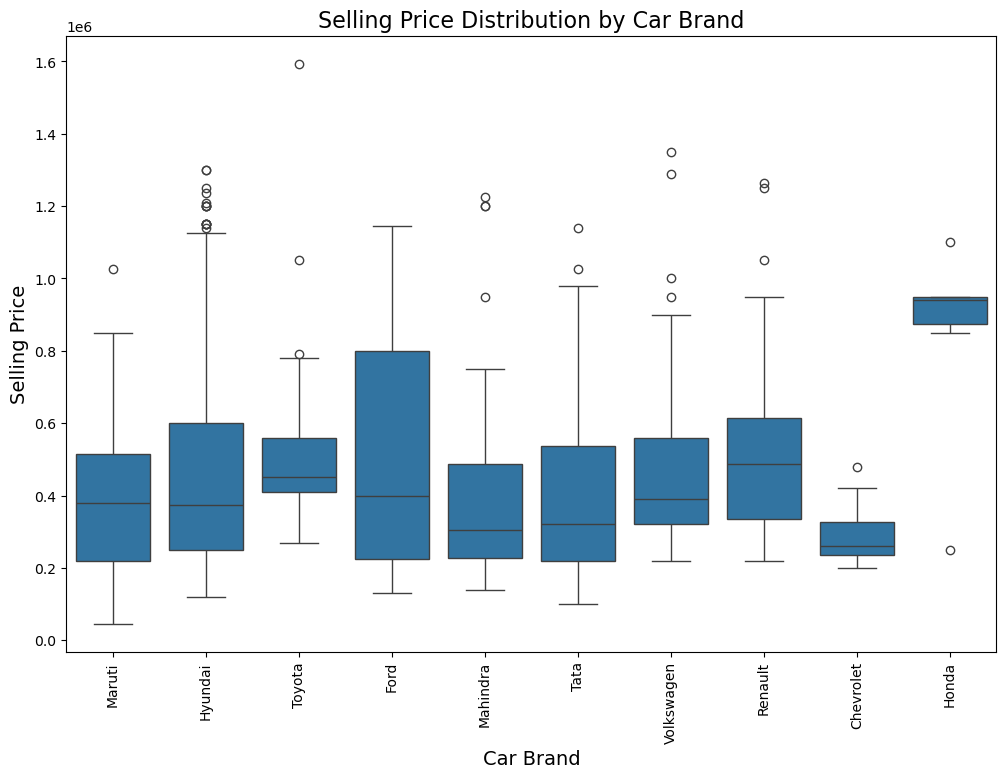

In [22]:
# Boxplot to visualize the distribution of selling price by car brand
plt.figure(figsize=(12,8))
sns.boxplot(x='name', y='selling_price', data=car_df)
plt.xticks(rotation=90)  # Rotate car names for better readability
plt.title('Selling Price Distribution by Car Brand', fontsize=16)
plt.xlabel('Car Brand', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.show()

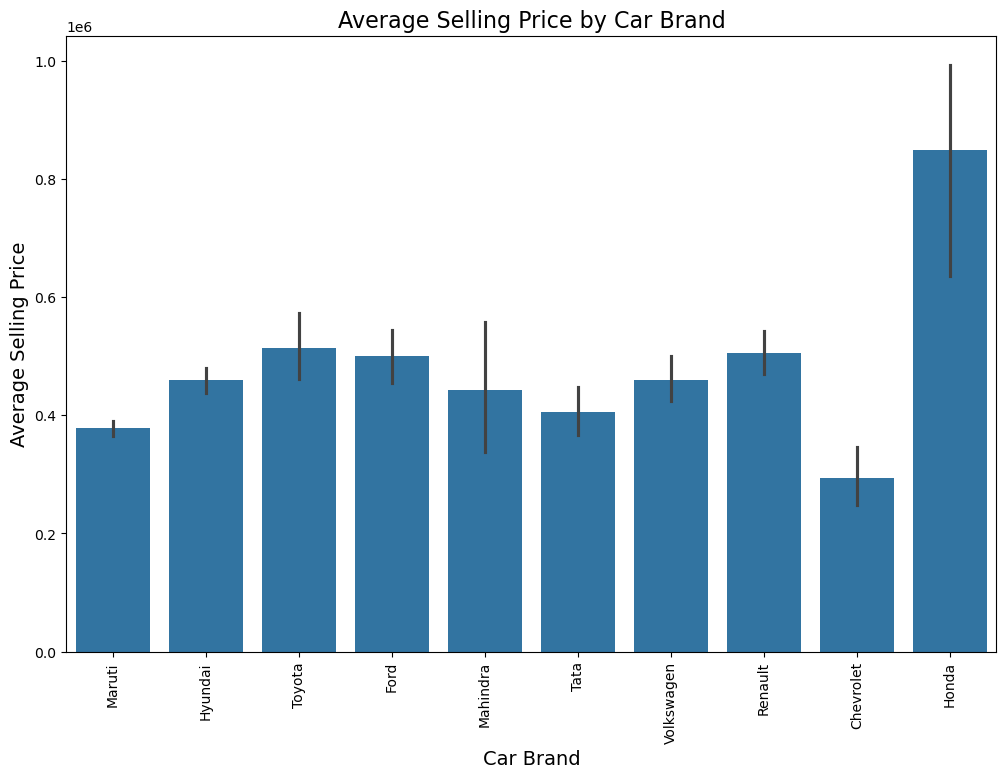

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x='name', y='selling_price', data=car_df, estimator='mean')
plt.xticks(rotation=90)  # Rotate car names for better readability
plt.title('Average Selling Price by Car Brand', fontsize=16)
plt.xlabel('Car Brand', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)
plt.show()

In [24]:
fig=px.histogram(car_df,
                 x='selling_price',
                 color='seats',
                 title='Selling Price vs Seats')
fig.update_layout(bargap=0.05)
fig.show()

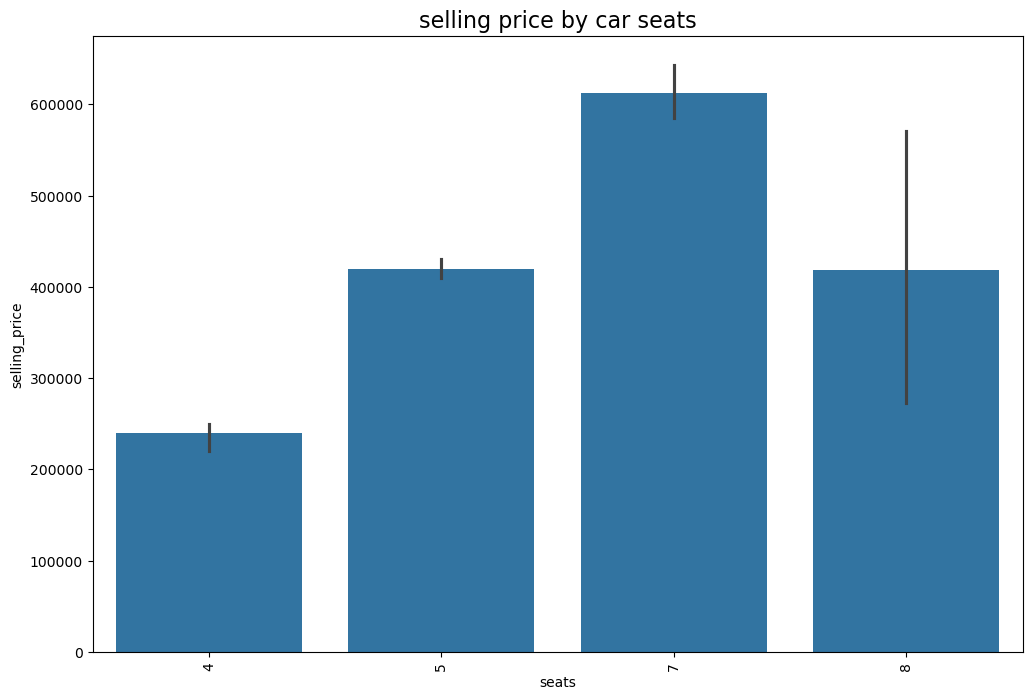

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x='seats', y='selling_price', data=car_df, estimator='mean')
plt.xticks(rotation=90)  # Rotate car names for better readability
plt.title('selling price by car seats', fontsize=16)

plt.show()

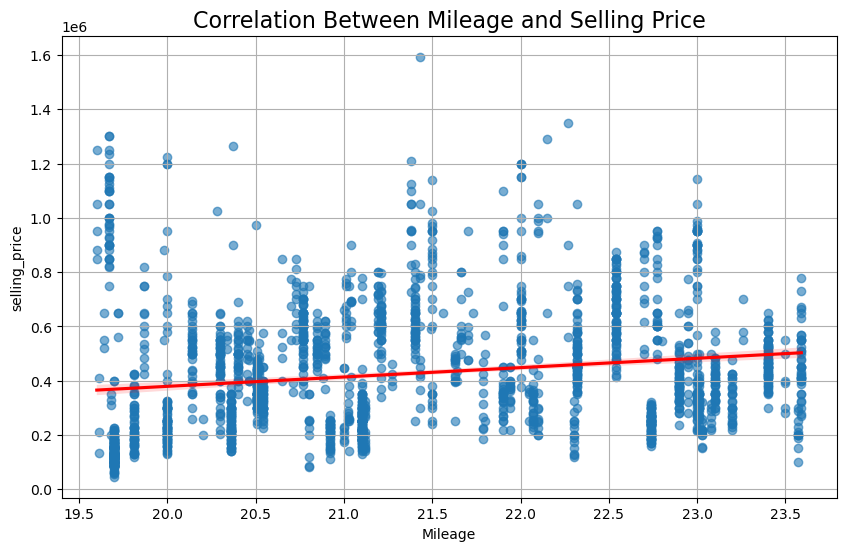

In [26]:
plt.figure(figsize=(10,6))
sns.regplot(x='Mileage', y='selling_price', data=car_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Add labels and title
plt.title('Correlation Between Mileage and Selling Price', fontsize=16)

plt.grid(True)
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

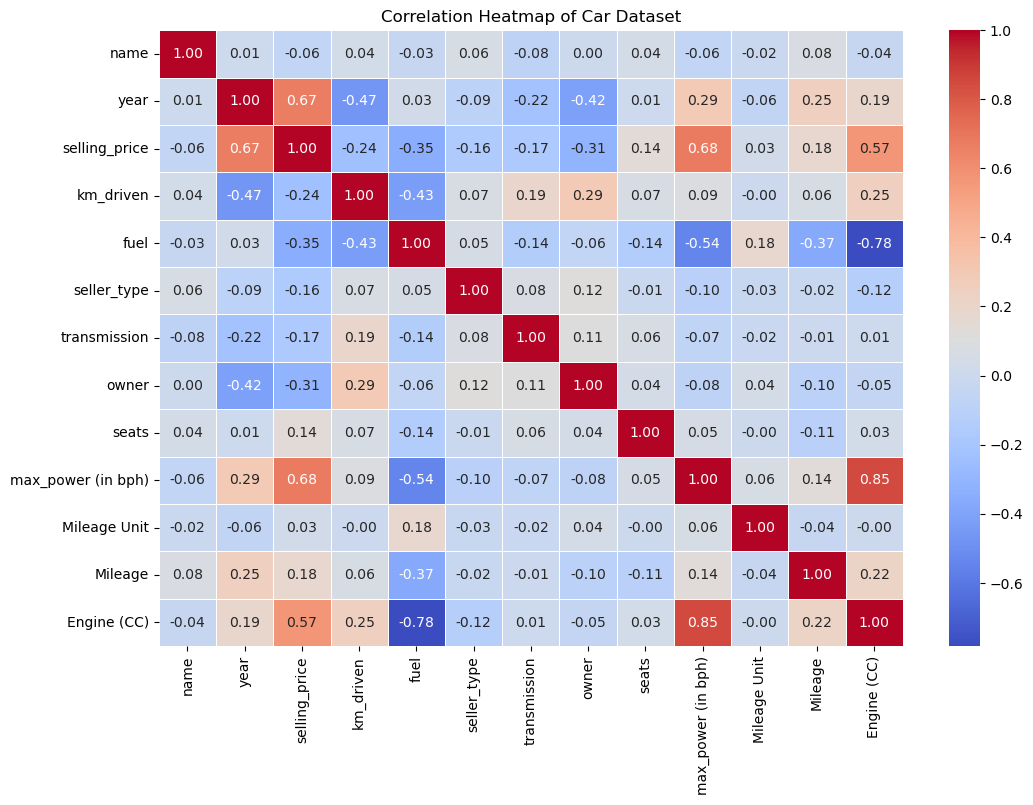

In [28]:
label_encoders = {}
for col in car_df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    car_df[col] = label_encoders[col].fit_transform(car_df[col])
corr_matrix = car_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Car Dataset")
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [30]:
car_df['selling_price'].fillna(car_df['selling_price'].median(), inplace=True)
X = car_df[['year', 'km_driven', 'owner', 'seats', 'Mileage', 'Engine (CC)', 'max_power (in bph)', 
            'seller_type', 'transmission','Mileage Unit']]
y = car_df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R² Score: {r2}")
new_car_data = pd.DataFrame({
    'year': [2015],
    'km_driven': [50000],
    'owner': [0], 
    'seats': [5],
    'Mileage': [20],
    'Engine (CC)': [1500],
    'max_power (in bph)': [85],
    'seller_type': [1], 
    'transmission': [1] ,
    'Mileage Unit':[0]
})

predicted_price = model.predict(new_car_data)
print(f"Predicted Selling Price for the new car: ₹{predicted_price[0]:,.2f}")

MAE: 85507.06597814917, MSE: 12418304903.503967, RMSE: 111437.44838923748, R² Score: 0.7372898276526179
Predicted Selling Price for the new car: ₹478,893.82


C:\Users\rpran\AppData\Local\Temp\ipykernel_12920\4025327735.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



